# Importing necessary libraries

In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# To suppress warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
file_path = '/content/drive/MyDrive/city_day.csv'
df = pd.read_csv(file_path)


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Data Cleaning

In [ ]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
# Filter rows that have no missing values
rows_without_nulls = df.dropna()

# Display the rows or their count
print("Number of rows without null values:", len(rows_without_nulls))
rows_without_nulls.head()  # Display the first few rows


Number of rows without null values: 6236


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [ ]:
data = rows_without_nulls

In [26]:
data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,2018-11-09 22:01:32.366902016,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103
min,2015-01-01 00:00:00,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,2018-01-27 00:00:00,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,2019-03-12 00:00:00,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,2019-12-21 06:00:00,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,2020-07-01 00:00:00,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000
std,NaN,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826


# Exploratory Data Analysis

## Univariate Analysis

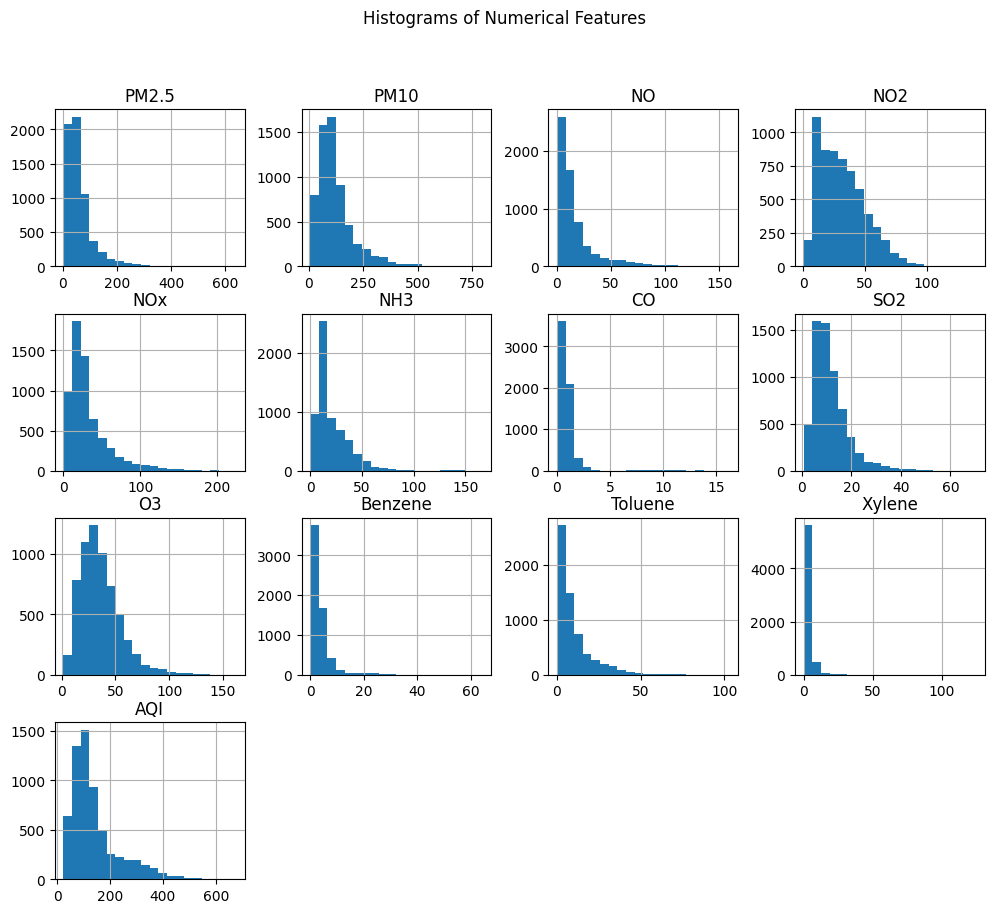

In [ ]:
data.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

## Bivariate Analysis

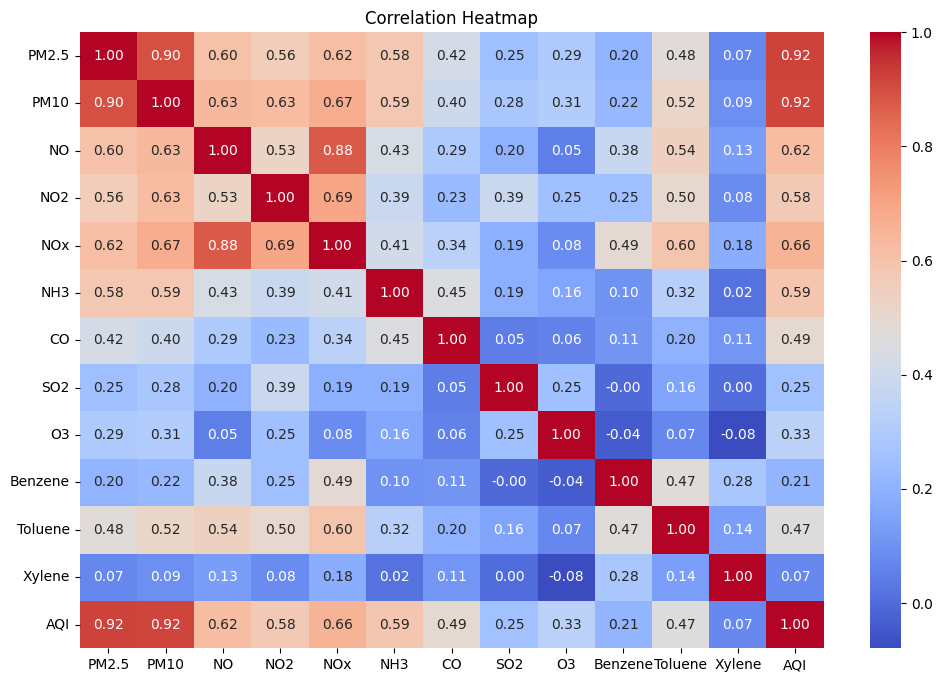

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Categorical Variables

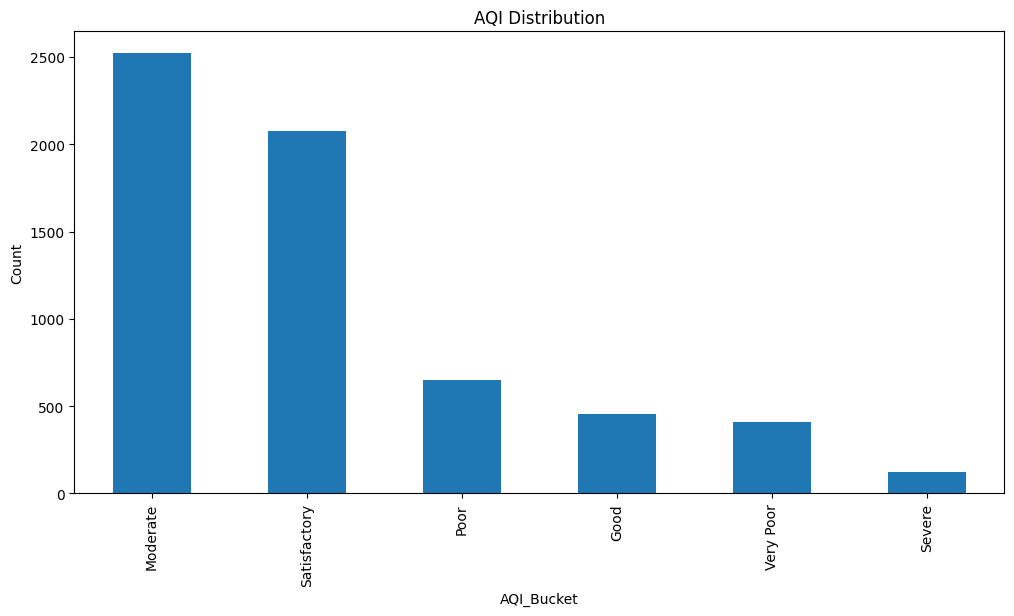

In [ ]:
data['AQI_Bucket'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title("AQI Distribution")
plt.ylabel("Count")
plt.show()

## Time Series Analysis

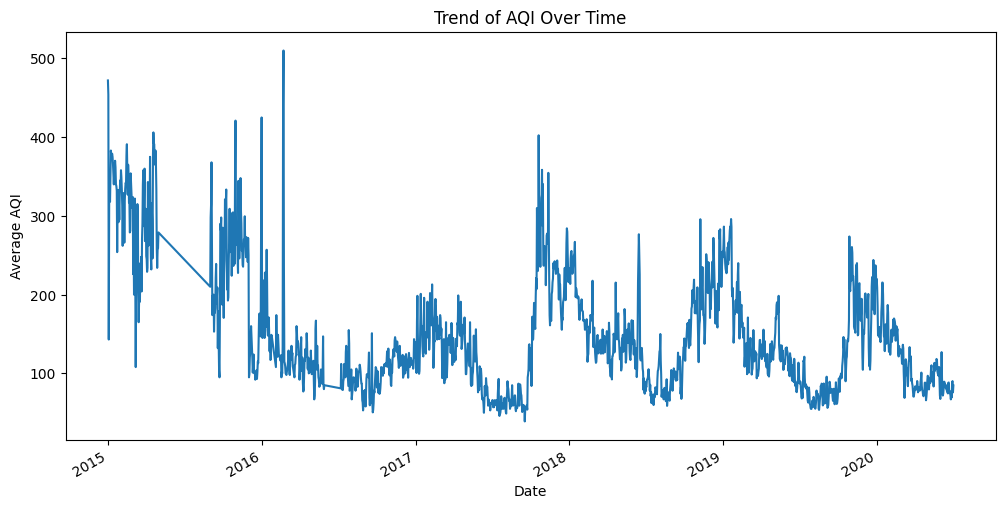

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.groupby('Date')['AQI'].mean().plot(figsize=(12, 6))
plt.title("Trend of AQI Over Time")
plt.ylabel("Average AQI")
plt.show()

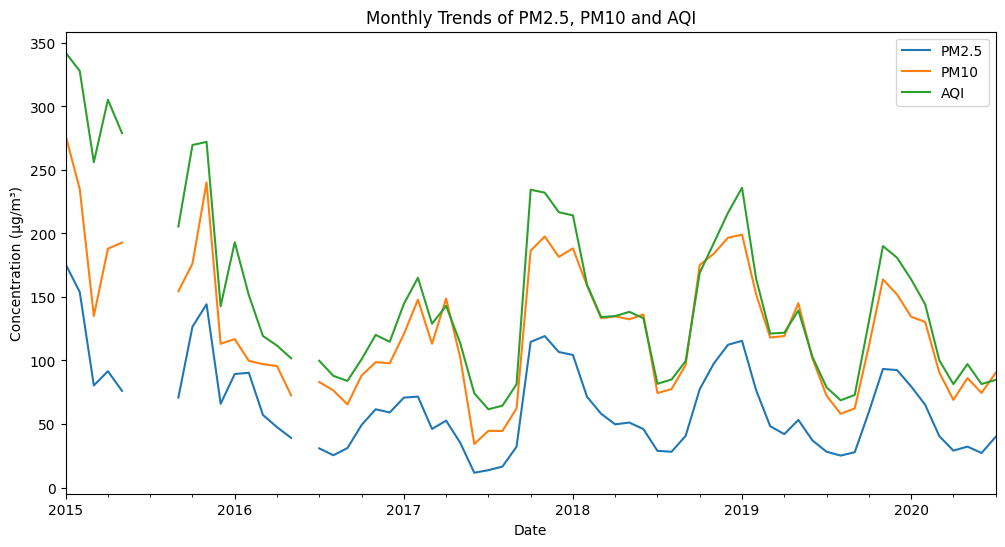

In [ ]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot PM2.5 and PM10 trends over time
data.set_index('Date')[['PM2.5', 'PM10', 'AQI']].resample('M').mean().plot(figsize=(12, 6))
plt.title("Monthly Trends of PM2.5, PM10 and AQI")
plt.ylabel("Concentration (µg/m³)")
plt.show()


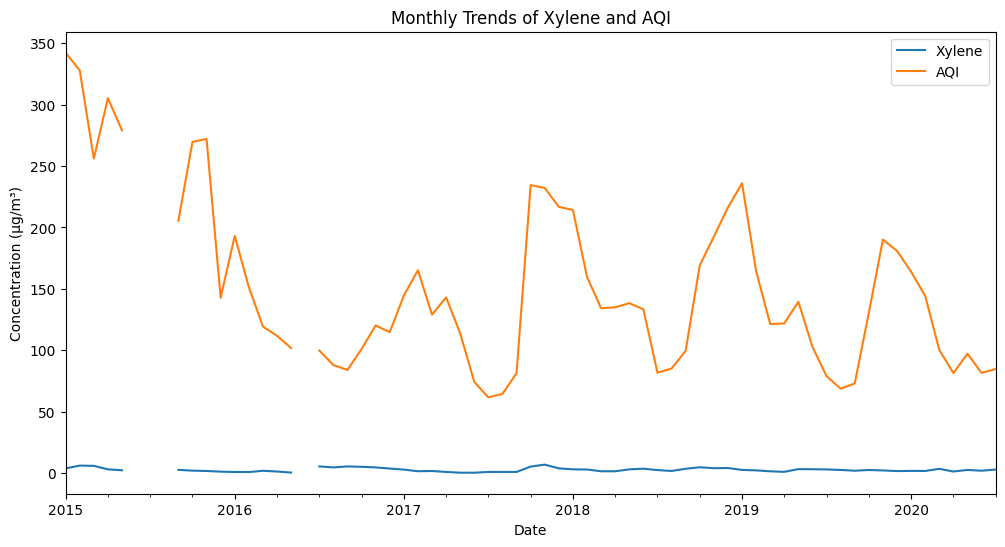

In [ ]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot PM2.5 and PM10 trends over time
data.set_index('Date')[['Xylene', 'AQI']].resample('M').mean().plot(figsize=(12, 6))
plt.title("Monthly Trends of Xylene and AQI")
plt.ylabel("Concentration (µg/m³)")
plt.show()


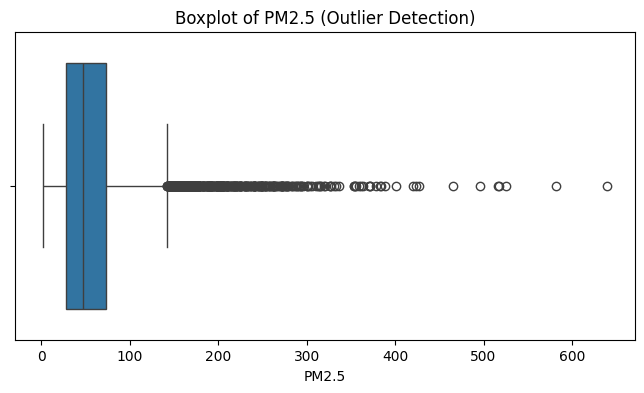

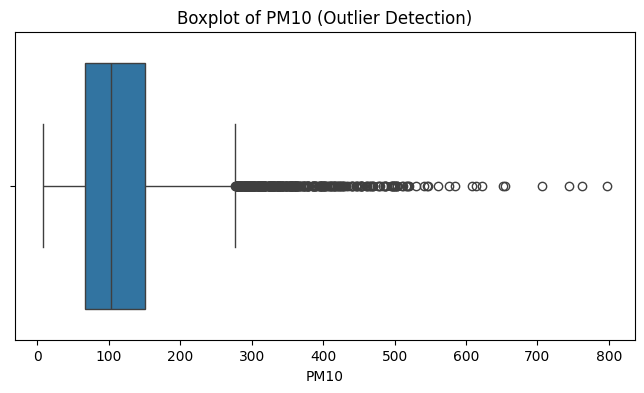

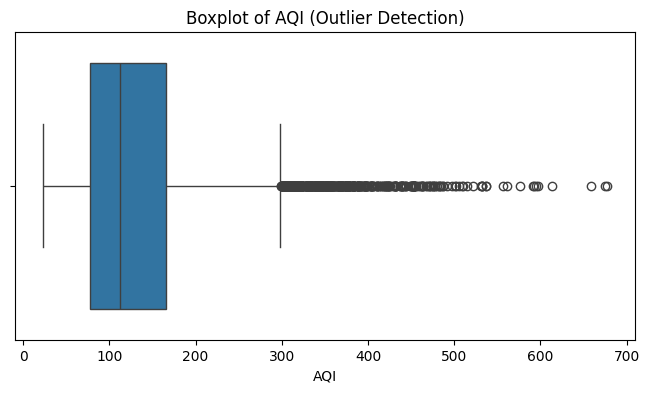

In [ ]:
for col in ['PM2.5', 'PM10', 'AQI']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()


## Dropping Columns

In [ ]:
# Drop the 'City' and 'AQI_Bucket' columns
df = data.drop(columns=['City', 'AQI_Bucket', 'Date'])

print("Columns after dropping:")
print(df.columns)


Columns after dropping:
Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['AQI'])  # Replace 'AQI' with your target column
y = df['AQI']

# Apply standard scaling to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training+validation and test sets (80-20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets (75-25 split of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3741, 12)
Validation data shape: (1247, 12)
Testing data shape: (1248, 12)


In [25]:
X_scaled[:10]

array([[ 0.37375467,  0.01260924, -0.7773514 , -0.59673464, -0.7437744 ,
        -0.62268395, -0.63739749,  0.51992943,  4.65229744, -0.69153128,
        -0.31121784, -0.55074012],
       [ 0.31640473,  0.06576563, -0.78633513, -0.30390943, -0.64262758,
        -0.65003535, -0.62264879,  2.15553585,  4.15874499, -0.68758008,
        -0.19319961, -0.54632968],
       [ 0.51079868,  0.13873909, -0.51981791, -0.04569083, -0.38994311,
        -0.48654855, -0.64477184,  3.08079785,  3.87079678, -0.67375088,
        -0.21924501, -0.53750881],
       [ 0.05311637, -0.22531222, -0.72145266, -0.19370066, -0.56375497,
        -0.57917035, -0.65952054,  1.04466323,  5.21949916, -0.69745808,
        -0.43167782, -0.5485349 ],
       [ 0.20747709, -0.09999837, -0.58819405, -0.45298408, -0.57909131,
        -0.52757565, -0.6079001 , -0.13459225,  3.76492594, -0.68955568,
        -0.4569093 , -0.54632968],
       [ 0.15776139, -0.09976522, -0.61514523, -0.61430416, -0.65394726,
        -0.60838662, -

# Model Training

In [20]:
# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)
scalar = f"saved_models/standard_scalar.joblib"

# Define models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf'),
}

# Dictionary to store results
results = []

# Train, evaluate, and save each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Validate the model
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)

    # Test the model
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Save the model
    model_path = f"saved_models/{name.replace(' ', '_')}.joblib"
    joblib.dump(model, model_path)

    # Append results
    results.append({
        "Model": name,
        "Validation MSE": val_mse,
        "Validation R²": val_r2,
         "Validation RMSE": val_rmse,
        "Test MSE": test_mse,
        "Test R²": test_r2,
        "Test RMSE": test_rmse,
        "Model Path": model_path,
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
results_df

,Model,Validation MSE,Validation R²,Validation RMSE,Test MSE,Test R²,Test RMSE,Model Path
0,Linear Regression,905.373876,0.897773,30.089431,660.545580,0.920610,25.701081,saved_models/Linear_Regression.joblib
1,Ridge Regression,905.281102,0.897783,30.087890,660.587884,0.920604,25.701904,saved_models/Ridge_Regression.joblib
2,Lasso Regression,905.300573,0.897781,30.088213,662.189898,0.920412,25.733051,saved_models/Lasso_Regression.joblib
3,Random Forest,507.004567,0.942753,22.516762,445.521132,0.946453,21.107371,saved_models/Random_Forest.joblib
4,Gradient Boosting,584.327514,0.934023,24.172867,437.140203,0.947460,20.907898,saved_models/Gradient_Boosting.joblib
5,Decision Tree,941.935044,0.893645,30.690960,943.819712,0.886563,30.721649,saved_models/Decision_Tree.joblib
6,XGBoost,653.826338,0.926176,25.570028,472.572796,0.943202,21.738740,saved_models/XGBoost.joblib
7,Support Vector Regressor (SVR),2964.066742,0.665323,54.443243,2558.158248,0.692537,50.578239,saved_models/Support_Vector_Regressor_(SVR).jo...


## Feature Importance

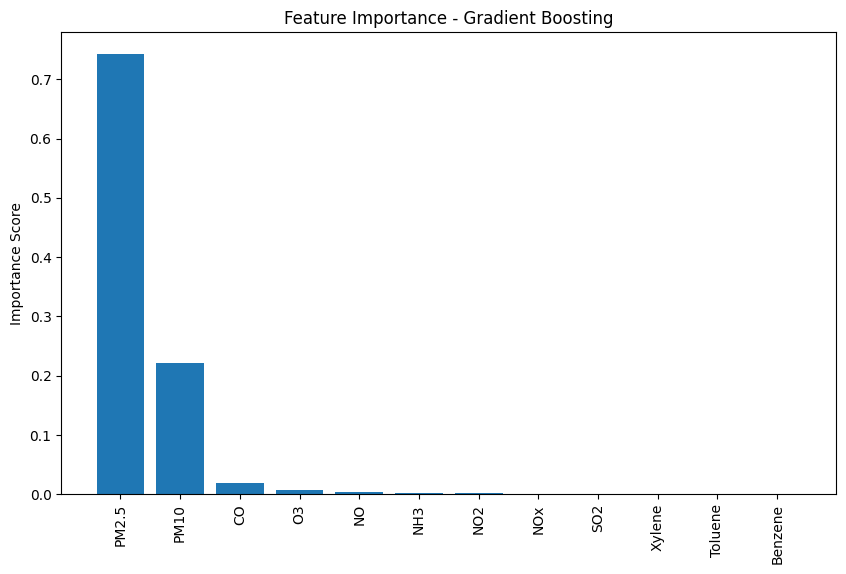

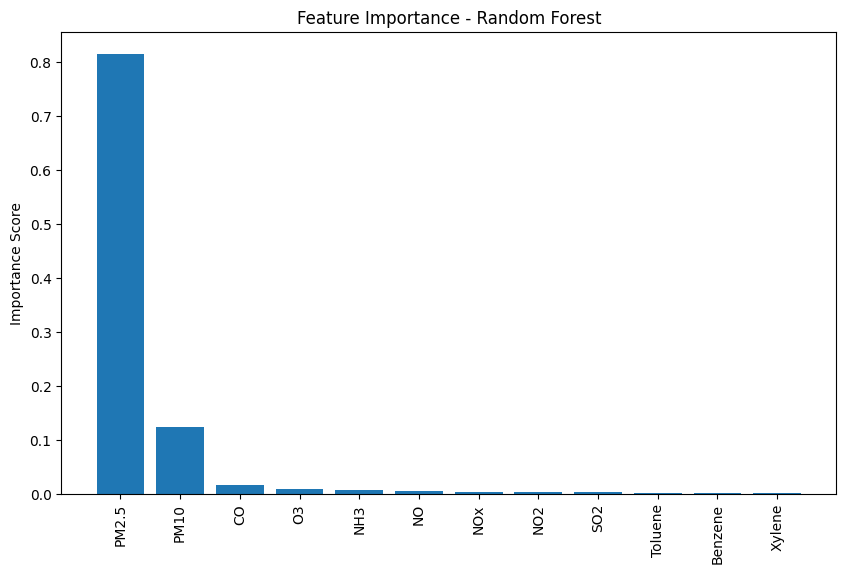

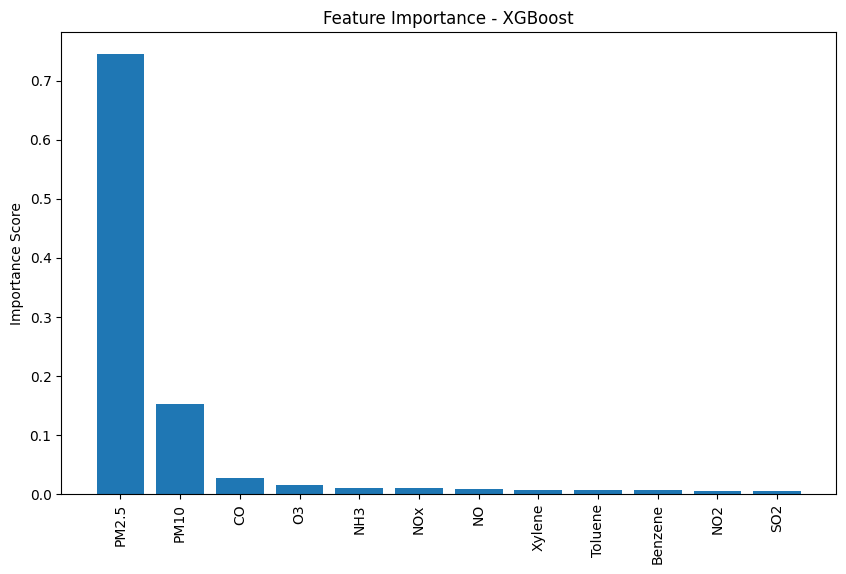

In [22]:
# Define a function to plot feature importance
def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importance[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.title(f"Feature Importance - {model_name}")
    plt.ylabel("Importance Score")
    plt.show()

# Gradient Boosting Feature Importance
gradient_boosting_model = joblib.load("saved_models/Gradient_Boosting.joblib")
plot_feature_importance(gradient_boosting_model, "Gradient Boosting", X.columns)

# Random Forest Feature Importance
random_forest_model = joblib.load("saved_models/Random_Forest.joblib")
plot_feature_importance(random_forest_model, "Random Forest", X.columns)

# XGBoost Feature Importance
xgboost_model = joblib.load("saved_models/XGBoost.joblib")
plot_feature_importance(xgboost_model, "XGBoost", X.columns)


## Ensemble Model

In [23]:
# Load the top models
gb_model = joblib.load("saved_models/Gradient_Boosting.joblib")
rf_model = joblib.load("saved_models/Random_Forest.joblib")
xgb_model = joblib.load("saved_models/XGBoost.joblib")

# Make predictions for each model
y_pred_gb = gb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Ensemble predictions (average)
y_pred_ensemble = (y_pred_gb + y_pred_rf + y_pred_xgb) / 3

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model Performance:")
print("MSE:", ensemble_mse)
print("RMSE:", ensemble_rmse)
print("R²:", ensemble_r2)


Ensemble Model Performance:
MSE: 409.4101559304101
RMSE: 20.23388632790078
R²: 0.9507932933272807
